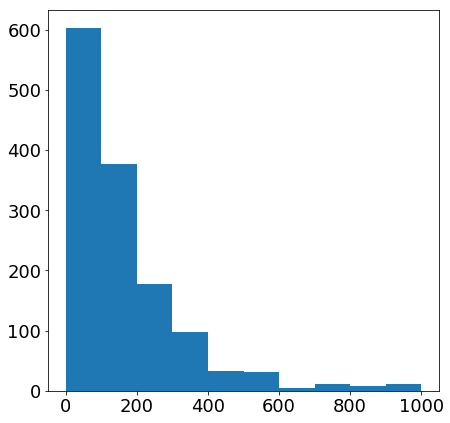

In [255]:
import pandas as pd
import numpy as np
data = pd.read_csv('shpt.csv')
df = pd.DataFrame(data)
# no need columns 
df = df.drop(['WO','Bound'],axis=1)
df= df[df['Profit']<1000]
y = np.array(df['Profit'])
#print(df.corr())
#print(df.var())
#print(df.describe())
#print(y)
import matplotlib.pyplot as plt
plt.hist(y)
plt.show()

In [235]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
new_df = pd.get_dummies(data=df,columns=['Term','From','To','Mode','Commodity','Cargo Source']) #,'GNT Staff','Customer Name'
#new_df = new_df.drop(['WO','Cargo Source'],axis=1) #,'GNT Staff','Customer Name','Shipper','Cnee','Country','Carrier','Kick_Back','Comision','Mark_Up'
print(new_df.info())
feature_names = list(np.array(new_df.columns))
#print(feature_names)
from sklearn.externals import joblib
joblib.dump(feature_names, 'model_columns_xgboost.pkl')
print("Models columns dumped!")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 12 to 1370
Columns: 314 entries, Vol to Cargo Source_Nomination
dtypes: float64(1), int64(1), uint8(312)
memory usage: 443.6 KB
None
Models columns dumped!


In [236]:
Y = np.array(new_df['Profit'])
new_df = new_df.drop(['Profit'],axis=1)
X = np.array(new_df)
feature_names = list(np.array(new_df.columns))
print(X.shape)
print(X[0])
print(Y[0])
print(Y.shape)
print(len(feature_names))
from sklearn.externals import joblib
joblib.dump(feature_names, 'model_columns_xgboost.pkl')
print("Models columns dumped!")

(1352, 313)
[10  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1]
992.67
(1352,)
313
Models columns 

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,Normalizer
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Xs = SS.fit_transform(X)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1081, 313)
(271, 313)
(1081,)
(271,)


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pred: 481.26694 - True: 540.0 Diff: 58.73
Pred: 105.799416 - True: 101.0 Diff: -4.8
Pred: 19.791065 - True: 25.0 Diff: 5.21
Pred: 110.82728 - True: 75.0 Diff: -35.83
Pred: 248.43146 - True: 40.0 Diff: -208.43
Pred: 109.19891 - True: 93.79 Diff: -15.41
Pred: 77.45689 - True: 43.17 Diff: -34.29
Pred: 184.347 - True: 322.23 Diff: 137.88
Pred: 102.98012 - True: 102.0 Diff: -0.98
Pred: 144.76541 - True: 61.4 Diff: -83.37
Root Mean squared error: 93.35
R2 Score: 0.59


Text(0, 0.5, 'Predictions')

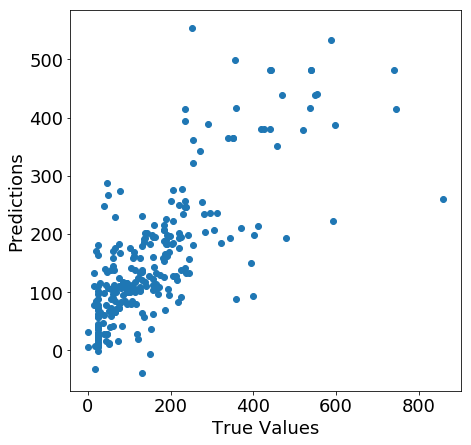

In [247]:
import xgboost as xgb
#DM_train = xgb.DMatrix(data=X_train,label=y_train,feature_names=feature_names)
#DM_test = xgb.DMatrix(data=X_test,label=y_test,feature_names=feature_names)
params = {"booster":"gbtree","objective":"reg:linear","eval_metric":"mae","lambda": 1,"max_depth":10,"eta": 0.0001,"learning_rate": 0.7, "alpha": 10,"colsample_bytree": 0.9,"gamma": 100}
num_boost_round = 20
model = xgb.XGBRegressor(booster='dart',objective="reg:linear",reg_lambda=10,max_depth=10,learning_rate=0.7,reg_alpha=0.1,colsample_bytree=0.9,gamma=100,feature_selector='shuffle',n_estimators=100)
model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False, eval_metric='mae') #mae rmse,eval_metric='rmse'
#xg_reg = xgb.train(params = params, dtrain=DM_train,num_boost_round=num_boost_round)
y_pred = model.predict(X_test)
#xg_reg.save_model('xgb-profit-quote.model')
import pickle
pickle.dump(model, open("xgb-profit-quote.dat", "wb"))

from sklearn.metrics import mean_squared_error, r2_score
for i in range(10):
    print('Pred:',y_pred[i],'- True:',y_test[i],'Diff:',round(y_test[i]-y_pred[i],2))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score: %.2f' % r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [239]:
#from sklearn.model_selection import KFold, train_test_split, GridSearchCV

#xgb_model = xgb.XGBRegressor(booster='gbtree',objective="reg:linear")
#clf = GridSearchCV(xgb_model,
#                   {'max_depth': [2,4,6,10,15,20],
 #                   'n_estimators': [50,100,200],
  #                  'lambda':[0.1,1,3,5,7],
   #                 'learning_rate': [0.1,0.3,0.5,0.7,0.9],
    #                'alpha': [0.1,1,3,5,7,10,15,20],
     #               'colsample_bytree': [0.1,0.3,0.5,0.7,0.9],
      #              'gamma':[1,10,20,40,60,80,100]}, verbose=1)
#clf.fit(X,y)
#print(clf.best_score_)
#print(clf.best_params_)